In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
SEP       = os.path.sep
SPLIT     = os.getcwd().split(SEP)
TIDX      = SPLIT.index('TIL')
ROOT_PATH = SEP.join(SPLIT[ : TIDX + 1])
DATA_PATH = f'{ROOT_PATH}/Dataset/birds/images to test/2.jpg'

In [3]:
def convolution(image, pool_size = 5):

    H, W = image.shape[:2]
    CHN  = image.shape[2] if len(image.shape) == 3 else 1

    filter = np.random.normal(size = (pool_size, pool_size))
    for h_idx in range(H - (pool_size - 1)):
        for w_idx in range(W - (pool_size -1)):
            for idx in range(CHN):
                partial  = image[w_idx: w_idx + pool_size, h_idx:h_idx + pool_size, idx]
                filtered = np.dot(partial, filter)
                
                image[w_idx: w_idx + pool_size, h_idx: h_idx + pool_size, idx] = filtered
    return image


def show_images(axes, images):

    for ax, image in zip(axes, images):
        ax.imshow(image)
        ax.axis(False)

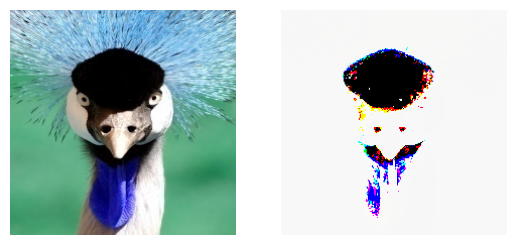

In [4]:
image  = cv2.imread(DATA_PATH)
image_ = image.copy()

for _ in range(5): image_ = convolution(image_, pool_size = 1)

_, axes    = plt.subplots(1, 2)
show_images(axes, [image, image_])